In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
from __future__ import division

# turn of data table rendering
pd.set_option('display.notebook_repr_html', False)

sns.set_palette(['#00A99D', '#F5CA0C', '#B6129F', '#76620C', '#095C57'])
np.version.full_version

'1.18.5'

## Data
We use a random sample of social media influence scores from the service [Klout.com](http://klout.com/ "Klout scores") as presented in Udacity's [Intro to Inferential Statistics](https://www.udacity.com/course/ud201). Of a population of 620+ milion scores we got a sample size $n=1048$.

In [2]:
# Load the data from a csv file
data = pd.read_csv('data/klout-scores.csv', header=None, names=['scores'])
data.head()

      scores
0  25.104179
1  60.908747
2  23.222238
3  51.553491
4  22.629690

D:\1\a3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


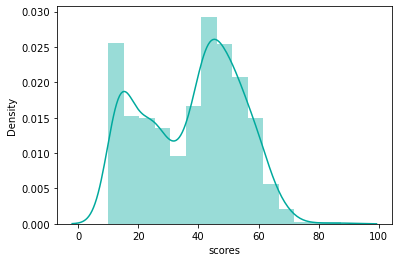

In [3]:
# Plot the sample and note the bimodal distribution shape
# The first peak are social media consumers, second peak influencers
p=sns.distplot(data.scores)

In [4]:
# Sample size
n = data.scores.count()

# The confidence coefficient
confidence_coef = .95

# The alpha level
alpha = 1. - confidence_coef

## Confidence Interval
If we want to estimate a population parameter (mean, proportion, standard deviation) from a sample statistic, we can never be sure of our outcome. But we can give some level of confidence of our prediction; the confidence interval (CI). We use the following symbols to depict parameters and statistics.

|   |mean|proportion|std dev|   |
|---|:---:|:---:|:---:|---|
|population|$\mu$|$p$|$\sigma$|parameters|
|sample|$\bar{x}$|$\hat{p}$|$s$|statistics|

Let's calculate 95% the confidence interval of the sample mean of Klout Scores. For large samples we can solve the following inequality with an alpha level of $\alpha=.05$.

$$\bar{x}-z_{\alpha/2}\cdot\frac{\sigma}{\sqrt{n}}\lt\mu_{estimator}\lt\bar{x}+z_{\alpha/2}\cdot\frac{\sigma}{\sqrt{n}}$$ 

In [5]:
# First we need our sample mean
# This is called the point estimate
klout_xbar = data.scores.mean()
klout_xbar

37.719054832538156

In [6]:
# We also need the standard error of the sample
# Since our sample size is large (> 30) we can use
# the sample standard deviation as an approximation of sigma
klout_s = data.scores.std()
klout_s

16.04431497904899

In [7]:
# The we need to find the z score to calculate the
# lower and upper bound of our confidence interval
# This is called the critical value
critical_value = stats.norm.ppf(alpha / 2) * -1.
critical_value

1.959963984540054

In [8]:
# An easier way to get the critical values calling scipy.stats
# interval function. The alpha .95 being a littbe bit misleading since
# it is not our alpha but our confidence coefficient
zscore_interval = stats.norm.interval(alpha=confidence_coef)
zscore_interval

(-1.959963984540054, 1.959963984540054)

In [9]:
# We need the standard error to calculate the bounds
klout_SE = klout_s / math.sqrt(n)
klout_SE

0.49561054484656264

In [10]:
# Calculate the lower and upper bound Klout Score 
# for the confidence interval
klout_CI_mean_lower = klout_xbar - critical_value * klout_SE
klout_CI_mean_upper = klout_xbar + critical_value * klout_SE
klout_CI_mean_lower, klout_CI_mean_upper

(36.74767601428062, 38.69043365079569)

## So what does it all mean?
A confidence interval is a 'parameter catcher'. In this case we try to catch the real population mean from a sample by declaring a confidence interval. This mean we are 95% sure that the real population mean of Klout Scores lies somewhere fixed between 36.75 and 38.69.

Klout.com states their mean score is 40, so we did not catch the true population mean parameter. Since our calculations seems to be correct, this could mean that:
- Maybe our sample mean falls way below the population mean. Note we we're only 95% confident.
- Maybe Klout's communication on the average score is simplified to an easy to remember value of 40.

## The effect of sample size
Sample size effects the bounds of the confidence interval. The smaller the sample, the less confident we are, so the wider the confidence interval. Let's try this with a random sample from the Klout Score data of $n=50$.

In [11]:
# Let's create a sample of 50 random Klout Scores
n_50 = 50
data_50 = data.loc[np.random.choice(data.index, n_50)]
data_50.head()

        scores
830  52.166644
982  47.335136
640  61.666347
775  50.436751
985  43.341532

D:\1\a3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


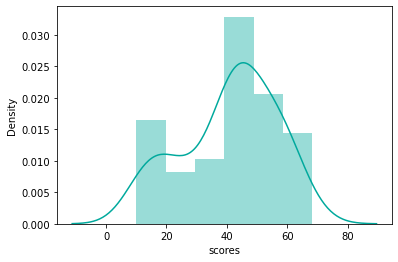

In [12]:
# Plot the sample and note a similar bimodal distribution shape
p=sns.distplot(data_50.scores)

In [13]:
# Get the point estimate
klout_50_xbar = data_50.scores.mean()
klout_50_xbar

40.849363034

In [14]:
# Get the sample standard deviation as an approximation of sigma
klout_50_s = data_50.scores.std()
klout_50_s

15.481721991408623

In [15]:
# Calculate the standard error for this sample size
klout_50_SE = klout_50_s / math.sqrt(n_50)
klout_50_SE

2.1894461209139875

In [16]:
# Calculate the lower and upper bound Klout Score 
# for the confidence interval of our sample of n=50
klout_50_CI_mean_lower = klout_50_xbar - critical_value * klout_50_SE
klout_50_CI_mean_upper = klout_50_xbar + critical_value * klout_50_SE
klout_50_CI_mean_lower, klout_50_CI_mean_upper

(36.558127490917656, 45.14059857708234)

With this sample size, we are 95% sure that the population mean lies within the range of *klout_50_CI_mean_lower* to *klout_50_CI_mean_upper*. Although this confidence interval does catch the mean parameter, it has also a much wider range. 